
**Created by Sanskar Hasija**

**Keras-OCR VS EasyOCR VS PYTESSERACT**

**24 August 2021**


# <center> Keras-OCR VS EasyOCR VS PYTESSERACT </center>

### [1. KERAS-OCR](#kerasocr) ###
### [2. EASYOCR](#easyocr) ###
### [3. PYTESSERACT](#pytesseract) ###
##    [Conclusions](#conclusions) ##

## Installing Keras-ocr , easyOCR , pytesseract, transformers for TrOCR

In [1]:
from IPython.display import clear_output
!pip3 install keras-ocr # for keras-ocr
!pip3 install pytesseract # pytesseract OCR installation
!pip3 install easyocr # for easyocr
# !pip3 install transformers # for 
!pip3 install git+https://github.com/huggingface/transformers # for transformers installation (TrOCR)
clear_output()

## IMPORTS

In [2]:
import pytesseract
import keras_ocr
import easyocr
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

2024-12-14 17:17:42.262466: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-14 17:17:42.289222: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-14 17:17:42.745206: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/paramiko/transport.py:237: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [16]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
from IPython.display import display
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-large-handwritten") 
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-large-handwritten")

/home/johnsonhk88/.local/lib/python3.10/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/home/johnsonhk88/.local/lib/python3.10/site-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may

preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.13k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.23G [00:00<?, ?B/s]

/home/johnsonhk88/.local/lib/python3.10/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


model.safetensors:   0%|          | 0.00/2.23G [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 1024,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 16,
  "num_channels": 3,
  "num_hidden_layers": 24,
  "patch_size": 16,
  "qkv_bias": false,
  "transformers_version": "4.48.0.dev0"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 1024,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 4096,
  "

generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

## TEST IMAGES

In [3]:
url = [
    "https://raw.githubusercontent.com/sanskar-hasija/ocr-comparision/main/test_images/image1.png",
    "https://raw.githubusercontent.com/sanskar-hasija/ocr-comparision/main/test_images/image2.png",
    "https://raw.githubusercontent.com/sanskar-hasija/ocr-comparision/main/test_images/image3.png",
    "https://raw.githubusercontent.com/sanskar-hasija/ocr-comparision/main/test_images/image4.png"
]
images = [ keras_ocr.tools.read(i) for i in url]

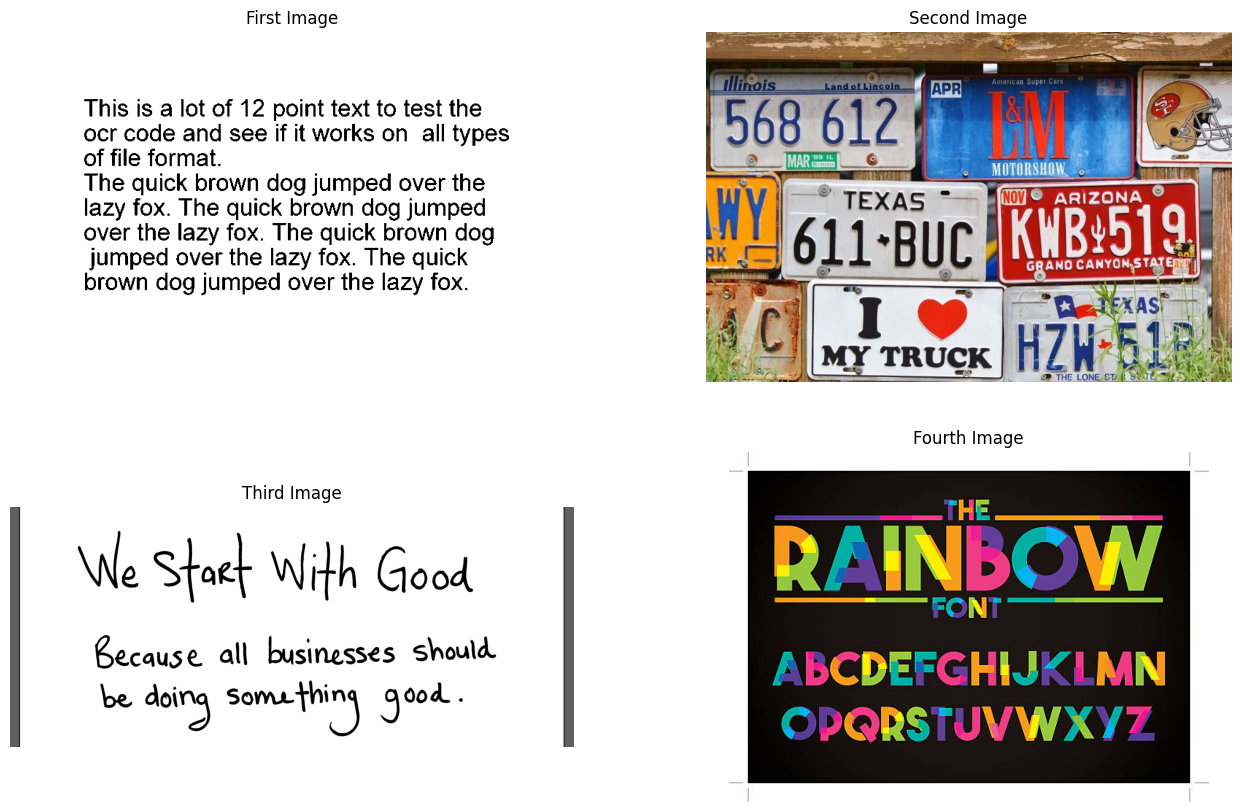

In [4]:
fig = plt.figure(figsize=(16,10))
rows = 2
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(images[0])
plt.axis('off')
plt.title("First Image")

fig.add_subplot(rows, columns, 2)
plt.imshow(images[1])
plt.axis('off')
plt.title("Second Image")

fig.add_subplot(rows, columns, 3)
plt.imshow(images[2])
plt.axis('off')
plt.title("Third Image")

fig.add_subplot(rows, columns, 4)
plt.imshow(images[3])
plt.axis('off')
plt.title("Fourth Image");

<a id="kerasocr"></a>
# KERAS_OCR

In [5]:
pipline = keras_ocr.pipeline.Pipeline() #Creting a pipline 
kerasocr_preds = pipline.recognize(images)

Looking for /home/johnsonhk88/.keras-ocr/craft_mlt_25k.h5


2024-12-14 17:17:54.191129: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-14 17:17:54.405057: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-14 17:17:54.413700: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Looking for /home/johnsonhk88/.keras-ocr/crnn_kurapan.h5


2024-12-14 17:17:58.929517: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8700
2024-12-14 17:18:00.407624: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.35GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-12-14 17:18:00.407661: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.35GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-12-14 17:18:00.628554: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.35GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if m

4/4 [==============================] - 1s 81ms/step


### Keras-ocr plots boxes of detected text with annotations on the input image.

## Results of Keras-OCR

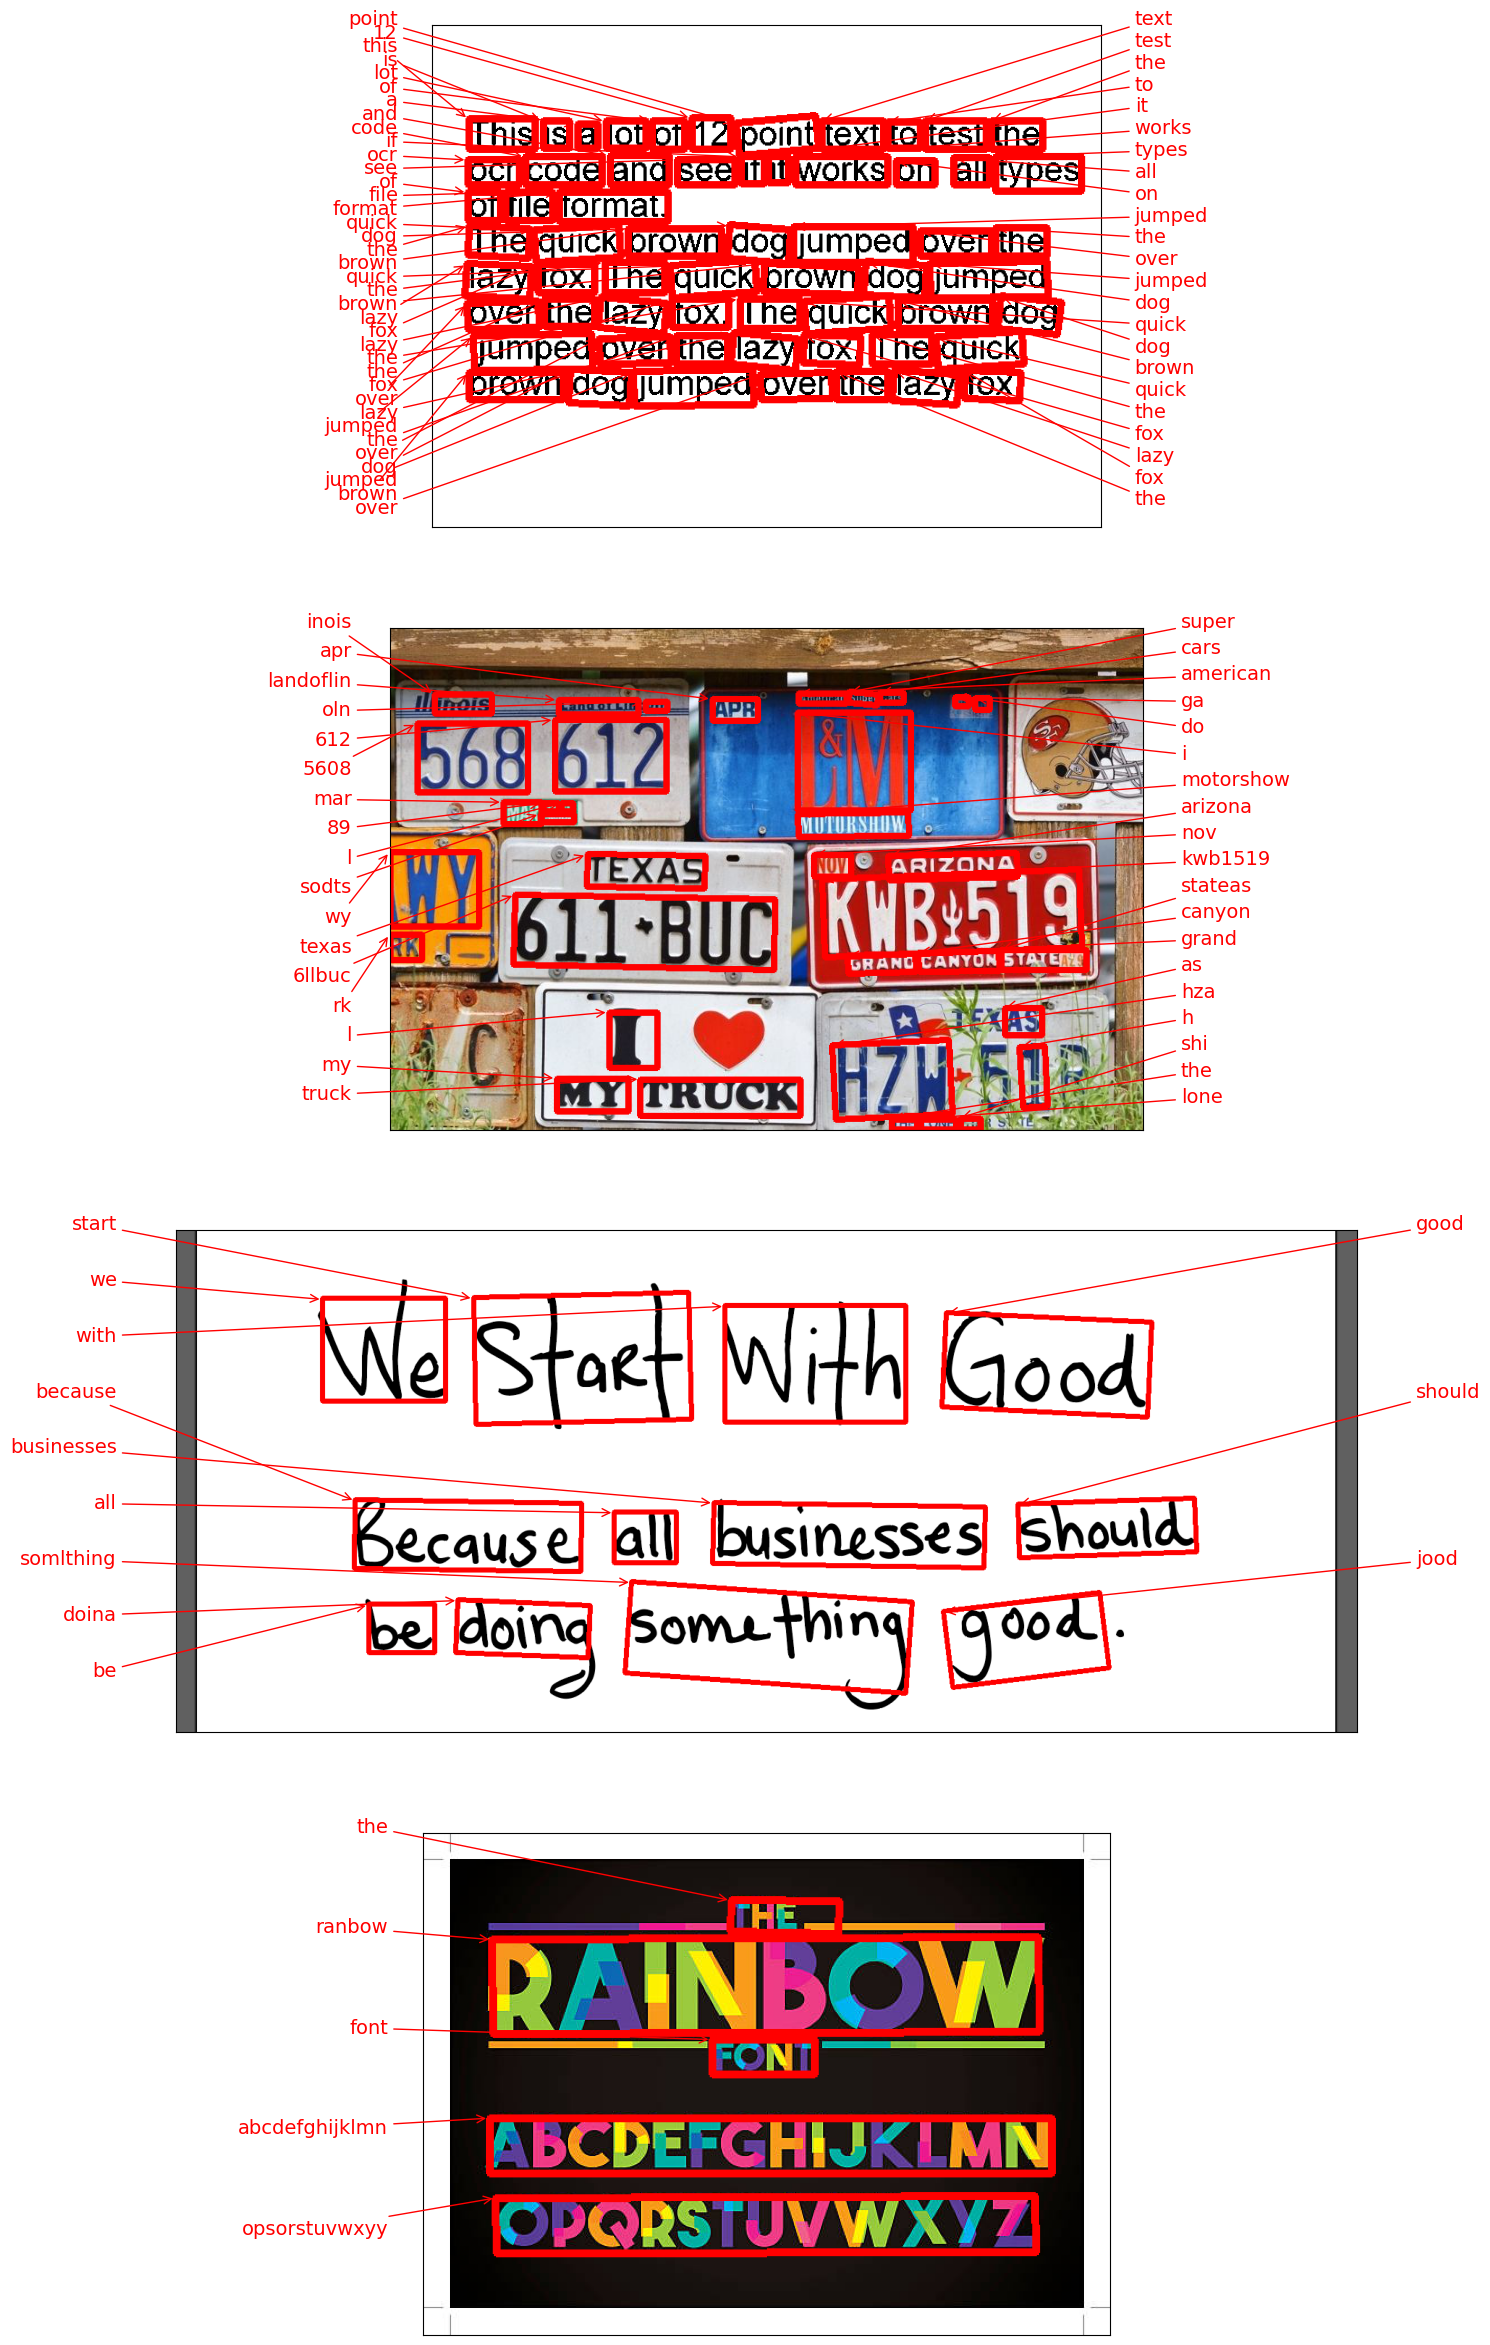

In [6]:
fig,axs = plt.subplots(nrows = 4 , figsize = (30,30))
for ax , image,  prediction in zip(axs , images , kerasocr_preds):
    keras_ocr.tools.drawAnnotations(image, prediction, ax)

<a id="easyocr"></a>
# EASYOCR

In [7]:
text_reader = easyocr.Reader(['en']) #Initialzing the ocr

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

## Results of EASY OCR

### First Image

This is a lot of 12 point text to test the
ocr code and see if it works on
all types
of file format:
The quick brown dog jumped over the
lazy fox The quick brown dog jumped
over the lazy fox. The quick brown dog
jumped over the lazy fox. The quick
brown dog jumped over the lazy fox.


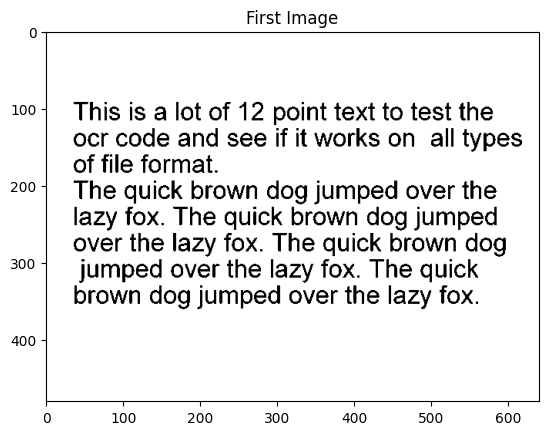

In [8]:
results = text_reader.readtext(images[0] )
for (bbox, text, prob) in results:
    print(text)
plt.imshow(images[0])
plt.title("First Image");

### Second Image

Iigis
LandehLincoln 
American Super Cars
APR
568 612
DM
'B9rIL
MAR
Wenn
MOTORSHOW
TEXAS
no
ARizONA
MY
RK
611*BUC |KLB 519]
GPANOCANYON staten
KAS
MY TRUCK
HZI
THE LONE SH


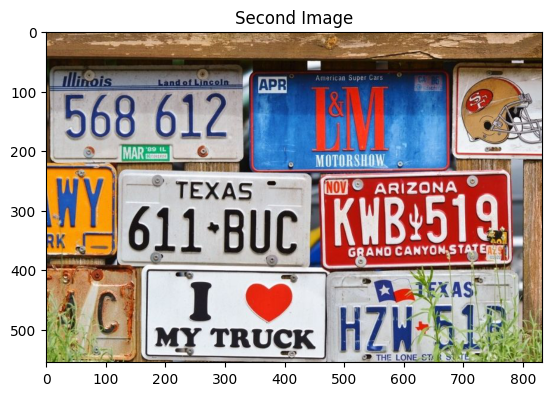

In [9]:
results = text_reader.readtext(images[1] )
for (bbox, text, prob) in results:
    print(text)
plt.imshow(images[1])
plt.title("Second Image");

### Third Image

We Sfart Wifh Good
Because
all
businesses
should
be
doinq
somathin)
9od


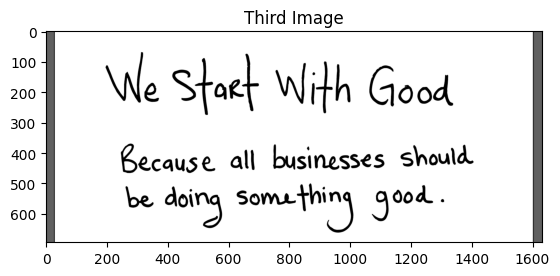

In [10]:
results = text_reader.readtext(images[2] )
for (bbox, text, prob) in results:
    print(text)
plt.imshow(images[2])
plt.title("Third Image");

### Fourth Image

THE
RANBOW
FONT
ABCDEFGHIJKLMN
OPQRSTUVWXYZ


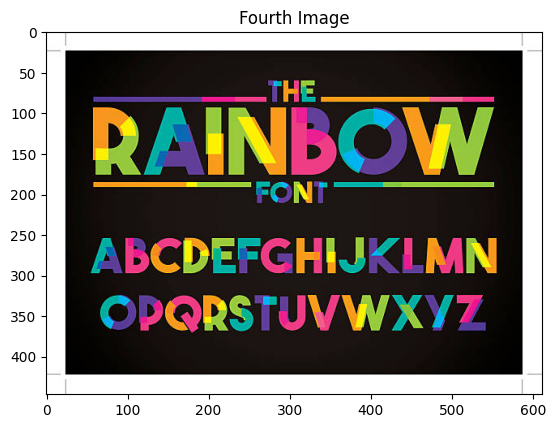

In [11]:
results = text_reader.readtext(images[3] )
for (bbox, text, prob) in results:
    print(text)
plt.imshow(images[3])
plt.title("Fourth Image");

<a id="pytesseract"></a>
# Pytesseract

In [12]:
tesseract_preds = []
for img in images:
    tesseract_preds.append(pytesseract.image_to_string(img))

##  Results of Pytesseract

### Image 1 

This is a lot of 12 point text to test the
ocr code and see if it works on all types
of file format.

The quick brown dog jumped over the
lazy fox. The quick brown dog jumped
over the lazy fox. The quick brown dog
jumped over the lazy fox. The quick
brown dog jumped over the lazy fox.



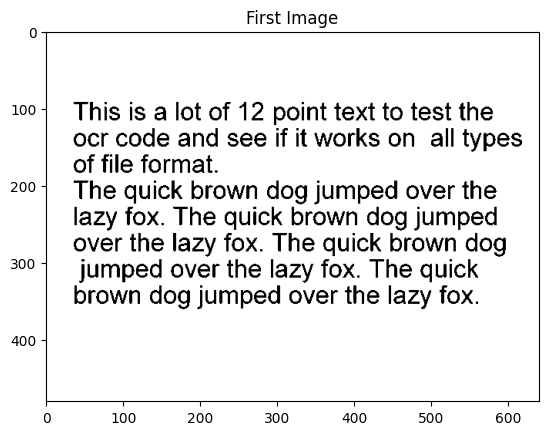

In [13]:
print(tesseract_preds[0])
plt.imshow(images[0])
plt.title("First Image");

### Image 2

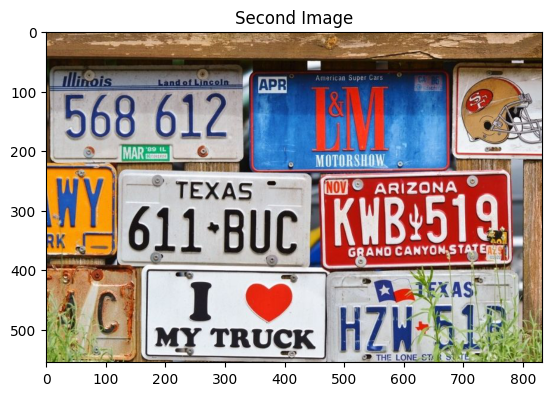

In [14]:
print(tesseract_preds[1])
plt.imshow(images[1])
plt.title("Second Image");

## Image 3

\Ne Staet With Good

Because all businesses should
be doing Soma thing good.



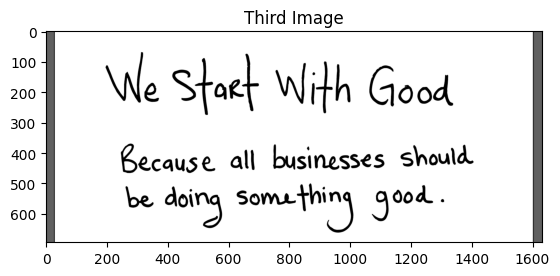

In [15]:
print(tesseract_preds[2])
plt.imshow(images[2])
plt.title("Third Image");

## Image 4

ABCDEFGHIJKLM
OPQRSTUVWKXYZ

 



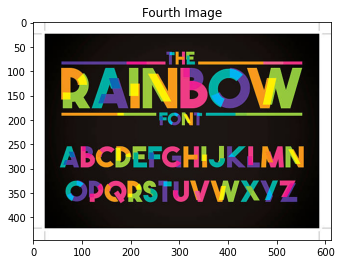

In [17]:
print(tesseract_preds[3])
plt.imshow(images[3])
plt.title("Fourth Image");

<a id="conclusions"></a>
# CONCLUSIONS

### * Keras-OCR is image specific OCR tool. If text is inside the image and their fonts and colors are unorganized, Keras-ocr consumes time if used on CPU
### * EasyOCR is lightweight model which is giving a good performance for receipt or PDF conversion. It is giving more accurate results with organized texts like pdf files, receipts, bills. EasyOCR also performs well on noisy images
### * Pytesseract is performing well for high-resolution images. Certain morphological operations such as dilation, erosion, OTSU binarization can help increase pytesseract performance. It also provides better results on handwritten text as compared to EasyOCR
### * All these results can be further improved by performing specific image operations.

# <center>If you find this notebook useful, support with an upvote!</center>